In [1]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [2]:
all_anime = pd.read_csv('all_anime_clean.csv')
all_anime

,Unnamed: 0,anime_id,user_id,Name,Tags,watching_status,watched_episodes,rating
0,12,1061,1,Heroic Age,"Action, Adventure, Mecha, Sci Fi, Aliens, Mili...",5,1,2.5
1,28,2375,1,Mazinger Edition Z: The Impact!,"Action, Mecha, Sci Fi, Super Robot",3,1,2.0
2,36,2764,1,Chu-Bra!!,"Comedy, Ecchi, Seinen, Panty Shots, School Lif...",5,6,2.0
3,41,4683,1,Fate/Zero 2,"Action, Fantasy, Contemporary Fantasy, Magic, ...",2,11,4.5
4,43,1333,1,Sky Girls TV,"Sci Fi, Slice of Life, Military, Post-apocalyp...",2,6,3.0
...,...,...,...,...,...,...,...,...
811855,20842079,8988,79300,Hakata Tonkotsu Ramens,"Mystery, Assassins, Criminals, Detectives, Gan...",3,1,3.5
811856,20842099,8894,79300,Katana Maidens: Toji no Miko,"Action, Monsters, School Life, Supernatural, S...",3,2,3.0
811857,20842113,8312,79300,Boruto: Naruto Next Generations,"Action, Fantasy, Shounen, Ninja, Based on a Manga",2,113,4.5
811858,20842165,9540,79300,Today's Menu for Emiya Family,"Slice of Life, Cooking, Food and Beverage, Rec...",3,6,2.5


In [3]:
all_anime = all_anime.drop(['Unnamed: 0'], axis=1)

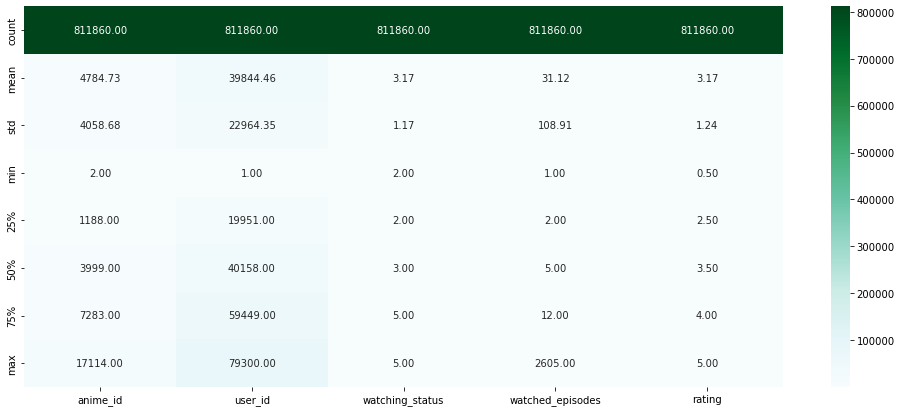

In [4]:
#MELIHAT STATISTIK UMUM PADA DATASET
fig, ax = plt.subplots(figsize=(17, 7))
sns.heatmap(all_anime.describe(),annot=True, fmt=".2f",cmap='BuGn')
plt.show()

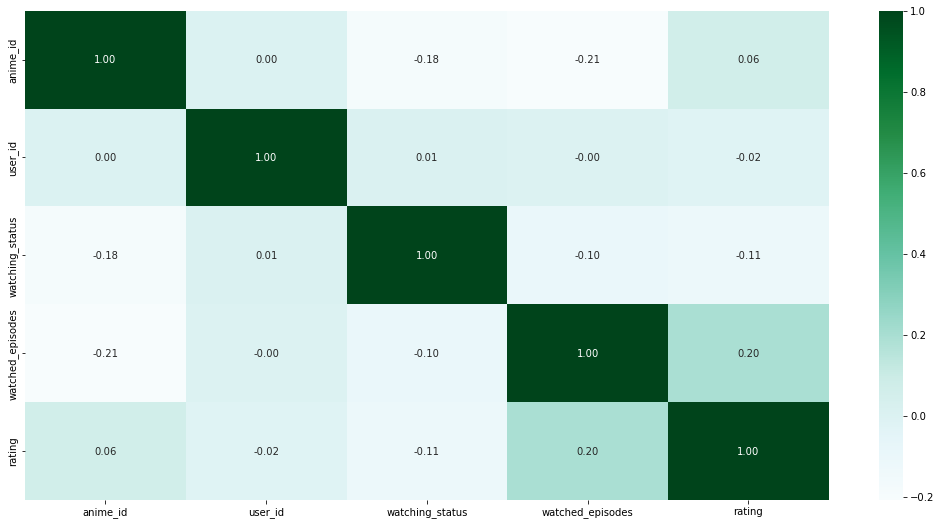

In [5]:
#KORELASI ANTAR ATRIBUT DATASET
fig, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(all_anime.corr(),annot=True, fmt=".2f",cmap='BuGn')
plt.show()

In [6]:
all_anime['user_id'].value_counts()

74265    1730
2153     1697
74487    1147
24411     941
79169     858
         ... 
69039       1
33826       1
21880       1
1863        1
62032       1
Name: user_id, Length: 53581, dtype: int64

Text(0.5, 1.0, 'Rating of Users')

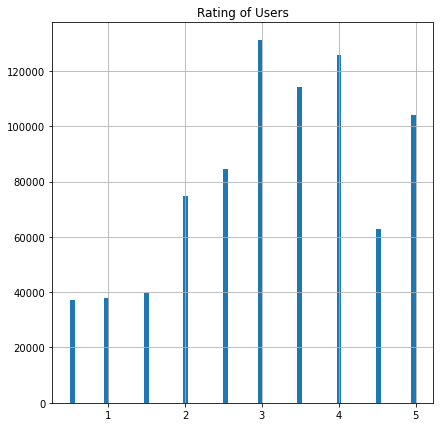

In [7]:
#Rating dari user
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
all_anime['rating'].hist(bins=70)
plt.title("Rating of Users")

(-0.5, 999.5, 699.5, -0.5)

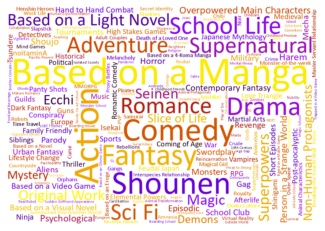

In [8]:
#Word of Clouds Genre dari Dataset
import matplotlib.font_manager as fm
font_path = 'CALIBRI.TTF'
fontprop = fm.FontProperties(fname=font_path)

nonull_anime=all_anime.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['Tags']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

genres_cloud = WordCloud(width=1000, height=700, background_color='white', colormap='gnuplot', font_path=font_path).generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

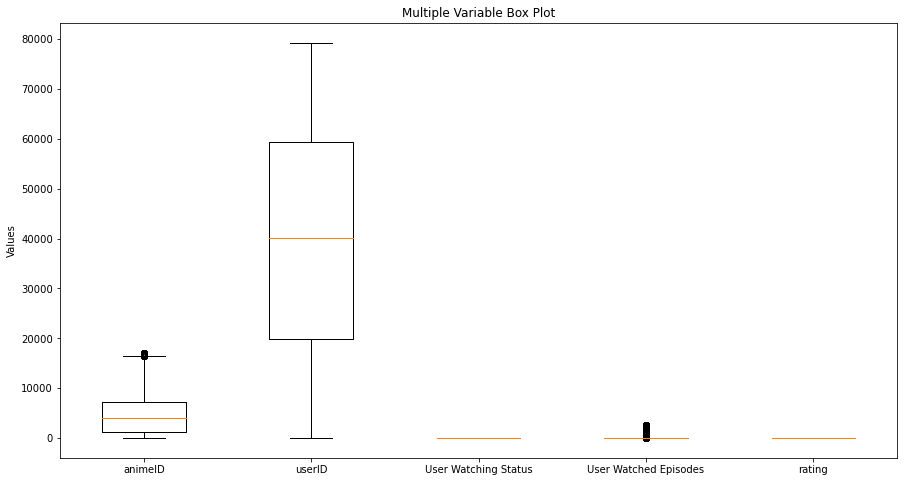

In [9]:
plt.figure(figsize = (15, 8))
plt.boxplot([all_anime['anime_id'], all_anime['user_id'],all_anime['watching_status'],all_anime['watched_episodes'], all_anime['rating']])

plt.title('Multiple Variable Box Plot')
plt.ylabel('Values')

plt.xticks([1, 2, 3, 4, 5], ['animeID', 'userID', 'User Watching Status', 'User Watched Episodes','rating'])


plt.show()

<AxesSubplot:xlabel='watched_episodes'>

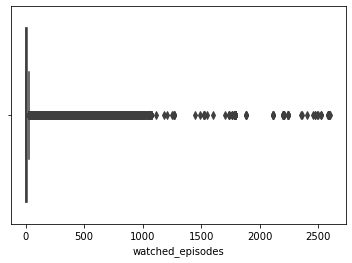

In [10]:
sns.boxplot(data=all_anime, x=all_anime.watched_episodes)

In [11]:
q1 = all_anime['watched_episodes'].quantile(0.25)
all_anime_q1 = all_anime.loc[all_anime['watched_episodes'] <= q1]
all_anime_q1

,anime_id,user_id,Name,Tags,watching_status,watched_episodes,rating
0,1061,1,Heroic Age,"Action, Adventure, Mecha, Sci Fi, Aliens, Mili...",5,1,2.5
1,2375,1,Mazinger Edition Z: The Impact!,"Action, Mecha, Sci Fi, Super Robot",3,1,2.0
5,2977,1,Working!!,"Comedy, Romance, Seinen, Slice of Life, Androp...",3,1,1.5
7,2359,1,Eden of the East,"Mystery, Amnesia, Conspiracy, High Stakes Game...",3,1,1.5
10,1111,1,The\r\n \r\n [email protected]\r\n \...,"Mecha, Sci Fi, Idols, Based on a Video Game",3,1,1.0
...,...,...,...,...,...,...,...
811846,8971,79300,FLCL: Alternative,"Action, Comedy, Drama, Sci Fi, Slice of Life, ...",3,2,3.0
811852,8141,79300,ERASED Recaps,"Mystery, Romance, Seinen, noitaminA, Recap, Su...",2,1,5.0
811855,8988,79300,Hakata Tonkotsu Ramens,"Mystery, Assassins, Criminals, Detectives, Gan...",3,1,3.5
811856,8894,79300,Katana Maidens: Toji no Miko,"Action, Monsters, School Life, Supernatural, S...",3,2,3.0


In [12]:
q2 = all_anime['watched_episodes'].quantile(0.50)
all_anime_q2 = all_anime.loc[all_anime['watched_episodes'] <= q2]
all_anime_q2

,anime_id,user_id,Name,Tags,watching_status,watched_episodes,rating
0,1061,1,Heroic Age,"Action, Adventure, Mecha, Sci Fi, Aliens, Mili...",5,1,2.5
1,2375,1,Mazinger Edition Z: The Impact!,"Action, Mecha, Sci Fi, Super Robot",3,1,2.0
5,2977,1,Working!!,"Comedy, Romance, Seinen, Slice of Life, Androp...",3,1,1.5
6,1954,1,Koi Koi Seven,"Comedy, Ecchi, Harem, Shounen, All-Girls Schoo...",3,3,1.5
7,2359,1,Eden of the East,"Mystery, Amnesia, Conspiracy, High Stakes Game...",3,1,1.5
...,...,...,...,...,...,...,...
811851,8192,79300,Record of Grancrest War,"Action, Adventure, Drama, Fantasy, Demons, Mag...",3,5,3.5
811852,8141,79300,ERASED Recaps,"Mystery, Romance, Seinen, noitaminA, Recap, Su...",2,1,5.0
811855,8988,79300,Hakata Tonkotsu Ramens,"Mystery, Assassins, Criminals, Detectives, Gan...",3,1,3.5
811856,8894,79300,Katana Maidens: Toji no Miko,"Action, Monsters, School Life, Supernatural, S...",3,2,3.0


In [13]:
q3 = all_anime['watched_episodes'].quantile(0.75)
all_anime_q3 = all_anime.loc[all_anime['watched_episodes'] <= q3]
all_anime_q3

,anime_id,user_id,Name,Tags,watching_status,watched_episodes,rating
0,1061,1,Heroic Age,"Action, Adventure, Mecha, Sci Fi, Aliens, Mili...",5,1,2.5
1,2375,1,Mazinger Edition Z: The Impact!,"Action, Mecha, Sci Fi, Super Robot",3,1,2.0
2,2764,1,Chu-Bra!!,"Comedy, Ecchi, Seinen, Panty Shots, School Lif...",5,6,2.0
3,4683,1,Fate/Zero 2,"Action, Fantasy, Contemporary Fantasy, Magic, ...",2,11,4.5
4,1333,1,Sky Girls TV,"Sci Fi, Slice of Life, Military, Post-apocalyp...",2,6,3.0
...,...,...,...,...,...,...,...
811853,9654,79300,Cells at Work!,"Action, Comedy, Shounen, Anthropomorphic, Educ...",3,7,4.0
811855,8988,79300,Hakata Tonkotsu Ramens,"Mystery, Assassins, Criminals, Detectives, Gan...",3,1,3.5
811856,8894,79300,Katana Maidens: Toji no Miko,"Action, Monsters, School Life, Supernatural, S...",3,2,3.0
811858,9540,79300,Today's Menu for Emiya Family,"Slice of Life, Cooking, Food and Beverage, Rec...",3,6,2.5
